In [1]:
from minisom import MiniSom
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
base = pd.read_csv("../../datasets/credit-data.csv")

In [3]:
# default significa aprovado ou não. (1 = desaprovado, e 0 = aprovado)
base.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
# apagando os registros nulos
base = base.dropna() 

In [5]:
base.loc[base.age < 0, "age"]

15   -28.218361
21   -52.423280
26   -36.496976
Name: age, dtype: float64

In [6]:
base.loc[base.age < 0, "age"] = round(base.age.mean())

In [7]:
X = base.iloc[:, 0:4].values

In [8]:
y = base.iloc[:,4].values

In [9]:
normalizador = MinMaxScaler(feature_range=(0,1))

In [10]:
X = normalizador.fit_transform(X)

In [11]:
X

array([[0.00000000e+00, 9.23175898e-01, 8.92091749e-01, 5.88837391e-01],
       [5.00250125e-04, 2.88121646e-01, 6.54707879e-01, 4.76826954e-01],
       [1.00050025e-03, 7.46334292e-01, 9.81188803e-01, 5.82620111e-01],
       ...,
       [9.98999500e-01, 4.86122016e-01, 2.16958067e-01, 4.01128949e-01],
       [9.99499750e-01, 4.75009983e-01, 1.00000000e+00, 1.17790295e-01],
       [1.00000000e+00, 9.88813673e-01, 8.29709134e-01, 5.35970280e-01]])

In [12]:
som = MiniSom(x = 15, y = 15, input_len = 4, random_seed=0)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [13]:
from pylab import pcolor, colorbar, plot

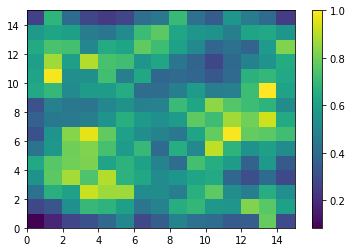

In [14]:
# os pontos mais claros são os outliders, eles representam as pessoas que possuem caracteristicas muito
# distantes das demais, oque pode significar que podem ser más pagadoras

pcolor(som.distance_map().T)
colorbar()

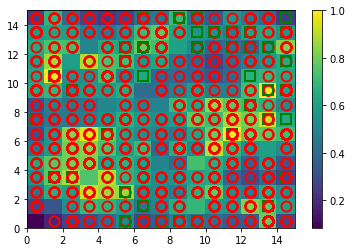

In [15]:
markers = ['o','s']
color = ['r','g']
pcolor(som.distance_map().T)
colorbar()
for i, item in enumerate(X):
    w = som.winner(item)
    plot(w[0] + 0.5 , w[1] + 0.5, markers[y[i]],
        markerfacecolor = 'None', markersize = 10,
        markeredgecolor = color[y[i]], markeredgewidth = 2)

In [16]:
mapeamento = som.win_map(X)
suspeitos = np.concatenate((mapeamento[13,9], mapeamento[(1,10)]), axis = 0)
suspeitos

array([[0.002001  , 0.93911717, 0.0115241 , 0.63704537],
       [0.03551776, 0.37114843, 0.0688488 , 0.40704143],
       [0.04252126, 0.49850557, 0.03750707, 0.55990706],
       [0.04352176, 0.15202568, 0.02520351, 0.10986432],
       [0.04902451, 0.67199918, 0.04759569, 0.69743738],
       [0.07003502, 0.50673027, 0.09831693, 0.47395536],
       [0.08954477, 0.37236289, 0.03429803, 0.42392475],
       [0.09204602, 0.82337536, 0.05506598, 0.75521155],
       [0.09254627, 0.89243913, 0.17394369, 0.70494986],
       [0.11255628, 0.76243032, 0.20137837, 0.54703249],
       [0.11405703, 0.89566582, 0.04732302, 0.61033325],
       [0.11455728, 0.91182119, 0.10590991, 0.57236087],
       [0.11755878, 0.72532642, 0.09649989, 0.53236755],
       [0.13756878, 0.84579909, 0.16436284, 0.77413594],
       [0.14757379, 0.75574574, 0.09995252, 0.46048845],
       [0.14857429, 0.63865401, 0.07492533, 0.41033119],
       [0.15257629, 0.60955851, 0.19655638, 0.64148319],
       [0.15307654, 0.47903738,

In [17]:
suspeitos = normalizador.inverse_transform(suspeitos)
suspeitos

array([[5.00000000e+00, 6.69526888e+04, 1.85843359e+01, 8.77009924e+03],
       [7.20000000e+01, 3.85649321e+04, 2.12164917e+01, 5.60416999e+03],
       [8.60000000e+01, 4.49303942e+04, 1.97773858e+01, 7.70831562e+03],
       [8.80000000e+01, 2.76129148e+04, 1.92124482e+01, 1.51362420e+03],
       [9.90000000e+01, 5.36018124e+04, 2.02406213e+01, 9.60137548e+03],
       [1.41000000e+02, 4.53414746e+04, 2.25695684e+01, 6.52521842e+03],
       [1.80000000e+02, 3.86256320e+04, 1.96300378e+01, 5.83656338e+03],
       [1.85000000e+02, 6.11677748e+04, 2.05836314e+01, 1.03966181e+04],
       [1.86000000e+02, 6.46196646e+04, 2.60420927e+01, 9.70478241e+03],
       [2.26000000e+02, 5.81216686e+04, 2.73018002e+01, 7.53110125e+03],
       [2.29000000e+02, 6.47809385e+04, 2.02281012e+01, 8.40241559e+03],
       [2.30000000e+02, 6.55884034e+04, 2.29182123e+01, 7.87973814e+03],
       [2.36000000e+02, 5.62671716e+04, 2.24861360e+01, 7.32924316e+03],
       [2.76000000e+02, 6.22885396e+04, 2.56021726e

In [18]:
classe = []

In [19]:
for i in range(len(base)):
    for j in range(len(suspeitos)):
        if base.iloc[i, 0] == int(round(suspeitos[j,0])):
            classe.append(base.iloc[i,4])

In [20]:
classe = np.asarray(classe)
classe

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
suspeitos_final = np.column_stack((suspeitos, classe))
suspeitos_final

array([[5.00000000e+00, 6.69526888e+04, 1.85843359e+01, 8.77009924e+03,
        1.00000000e+00],
       [7.20000000e+01, 3.85649321e+04, 2.12164917e+01, 5.60416999e+03,
        1.00000000e+00],
       [8.60000000e+01, 4.49303942e+04, 1.97773858e+01, 7.70831562e+03,
        1.00000000e+00],
       [8.80000000e+01, 2.76129148e+04, 1.92124482e+01, 1.51362420e+03,
        0.00000000e+00],
       [9.90000000e+01, 5.36018124e+04, 2.02406213e+01, 9.60137548e+03,
        1.00000000e+00],
       [1.41000000e+02, 4.53414746e+04, 2.25695684e+01, 6.52521842e+03,
        1.00000000e+00],
       [1.80000000e+02, 3.86256320e+04, 1.96300378e+01, 5.83656338e+03,
        1.00000000e+00],
       [1.85000000e+02, 6.11677748e+04, 2.05836314e+01, 1.03966181e+04,
        1.00000000e+00],
       [1.86000000e+02, 6.46196646e+04, 2.60420927e+01, 9.70478241e+03,
        1.00000000e+00],
       [2.26000000e+02, 5.81216686e+04, 2.73018002e+01, 7.53110125e+03,
        1.00000000e+00],
       [2.29000000e+02, 6.4780

In [22]:
suspeitos_final = suspeitos_final[suspeitos_final[:, 4].argsort()]
suspeitos_final

array([[1.98100000e+03, 4.02368721e+04, 5.25807728e+01, 4.35431441e+03,
        0.00000000e+00],
       [1.96000000e+03, 3.87551627e+04, 5.63554266e+01, 4.24449803e+03,
        0.00000000e+00],
       [7.69000000e+02, 2.83862536e+04, 3.11253324e+01, 1.71894378e+03,
        0.00000000e+00],
       [1.24800000e+03, 3.17227309e+04, 3.48518173e+01, 2.87775610e+03,
        0.00000000e+00],
       [1.37400000e+03, 3.13968660e+04, 3.49966814e+01, 3.71923013e+03,
        0.00000000e+00],
       [3.31000000e+02, 4.04962558e+04, 2.01054587e+01, 4.83460380e+03,
        0.00000000e+00],
       [3.09000000e+02, 6.01533370e+04, 2.03008601e+01, 6.47234701e+03,
        0.00000000e+00],
       [1.38800000e+03, 2.94098059e+04, 4.16103968e+01, 3.38856092e+03,
        0.00000000e+00],
       [1.48700000e+03, 2.97050747e+04, 4.18341371e+01, 1.91220509e+03,
        0.00000000e+00],
       [2.96000000e+02, 5.77875657e+04, 2.26446692e+01, 6.33985084e+03,
        0.00000000e+00],
       [1.54500000e+03, 2.8341